# Import lib

In [68]:
#!pip install opencv-python


In [69]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

import cv2
import pathlib
import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau



tf.__version__

'2.4.1'

In [70]:
seed = 123
np.random.seed(seed)

# Import the data. Analyse the dimensions of the data. Visualise the data

In [71]:
ROOT_PATH = "D:\\01_BALAJI\\01_MLAI\\MLAI\\11_ComputerVision\\Assignment"

Black-grass 264
Charlock 391
Cleavers 287
Common Chickweed 611
Common wheat 221
Fat Hen 475
Loose Silky-bent 672
Maize 221
Scentless Mayweed 516
Shepherds Purse 231
Small-flowered Cranesbill 496
Sugar beet 385
Total Train image ---  4770


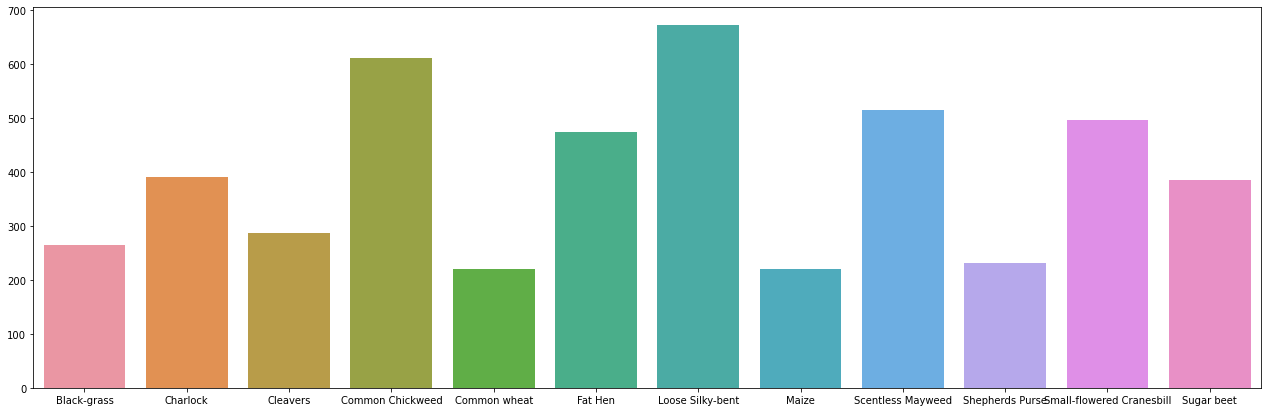

In [72]:
data_dir = pathlib.Path(os.path.join(ROOT_PATH,"Part1_data","train"))
totaltrainimage = 0
values =[]
labels=[]
for path in data_dir.iterdir():
    imagelist = list(data_dir.glob(path.name+'/*'))
    print(path.name,len(imagelist))
    labels.append(path.name)
    values.append(len(imagelist))
    #PIL.Image.open(str(imagelist[0]))
    totaltrainimage = totaltrainimage + len(list(data_dir.glob(path.name+'/*')))
    
print("Total Train image --- ",totaltrainimage)

fig, ax = plt.subplots(figsize=(22,7))
sns.barplot(x=labels,y=values)


In [73]:
batch_size = 32
img_height = 224
img_width = 224

In [74]:
# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',                                              
                                                 subset="training",
                                                 seed = 123
                                                )

# Setting testing data generator's source directory
validation_set = val_datagen.flow_from_directory(data_dir,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',                                              
                                                 subset="validation",
                                                 seed = 123
                                                )


Found 3825 images belonging to 12 classes.
Found 953 images belonging to 12 classes.


In [75]:
train_class_name = list(training_set.class_indices.keys())
train_class_value = list(training_set.class_indices.values())
print(training_set.class_indices)
plt.figure(figsize=(10, 10))
image,label = training_set.next()
print("Shape of the train image ( single batch ) -  " ,image.shape)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
Shape of the train image ( single batch ) -   (32, 224, 224, 3)


<Figure size 720x720 with 0 Axes>

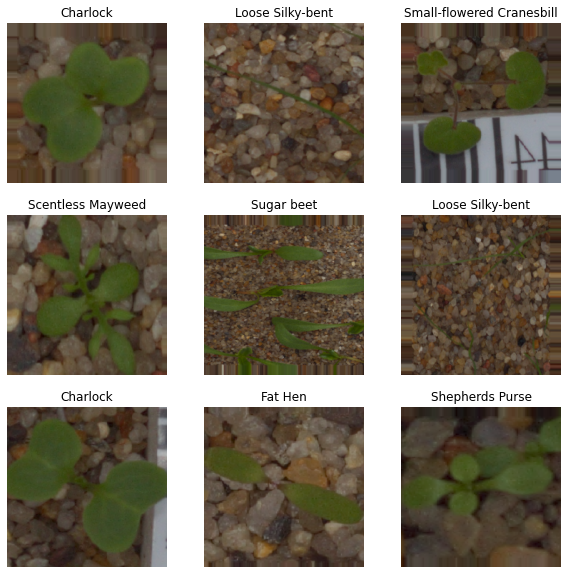

In [76]:
# Visualize the image ( Train image)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    plt.title(train_class_name[list(label[i]).index(1)])
    plt.axis("off")

In [77]:
validate_class_name = list(validation_set.class_indices.keys())
validate_class_value = list(validation_set.class_indices.values())
print(validation_set.class_indices)
plt.figure(figsize=(10, 10))
image,label = validation_set.next()
print("Shape of the validate image ( single batch ) -  " ,image.shape)


{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
Shape of the validate image ( single batch ) -   (32, 224, 224, 3)


<Figure size 720x720 with 0 Axes>

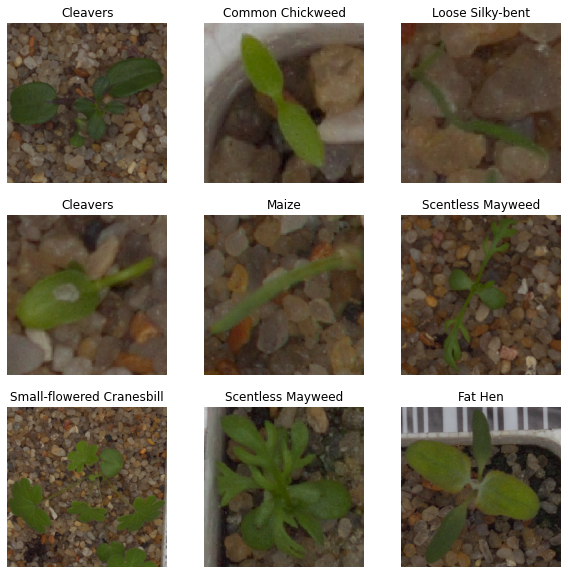

In [78]:
# Visualize the image ( Validate image )
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    plt.title(validate_class_name[list(label[i]).index(1)])
    plt.axis("off")

#  supervised learning algorithms Vs NN Vs CNN
 - Sample data is selected and trained and tested using supervised learning algorithms Vs NN Vs CNN

In [ ]:
train_image_length = training_set.__len__()
#train_image_length = 10
X_train=np.concatenate([training_set.next()[0] for i in range(train_image_length)])
y_train=np.concatenate([training_set.next()[1]  for i in range(train_image_length)])
print(X_train.shape)
print(y_train.shape)

In [ ]:
y_train_sl = np.argmax(y_train, axis=1)
print(y_train_sl.shape)

In [ ]:
val_image_length = validation_set.__len__()
#val_image_length = 10
X_val=np.concatenate([validation_set.next()[0] for i in range(val_image_length)])
y_val=np.concatenate([validation_set.next()[1]  for i in range(val_image_length)])
print(X_val.shape)
print(y_val.shape)

In [ ]:
y_val_sl = np.argmax(y_val, axis=1)
print(y_val_sl.shape)

In [ ]:
X_train_sl = X_train.reshape(X_train.shape[0],3*img_width*img_height)
X_train_sl.shape

In [ ]:
X_val_sl = X_val.reshape(X_val.shape[0],3*img_width*img_height)
X_val_sl.shape

## Training using - KNeighborsClassifier

In [ ]:
k_vals = [1,5,7,11]
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sl, y_train_sl)
    print("K Value - ",k,"Train Accuracy - ",round(knn.score(X_train_sl, y_train_sl)),"Val Accuracy - ",knn.score(X_val_sl, y_val_sl)) 

## Training using - NN

In [ ]:
from sklearn.utils import class_weight

def nn_model_dropout(kernel_initializer = "normal"):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(12, activation = "softmax"))
    return model


model_drop = nn_model_dropout(kernel_initializer="normal")
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

es = EarlyStopping(monitor='val_loss', patience=10,min_delta=0.01)
model_drop.compile(optimizer = optimizer, loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



fit_data = model_drop.fit(X_train, y_train, validation_data=(X_val,y_val),
                           batch_size = 16, epochs = 100, verbose = 1,callbacks=[es,learning_rate_reduction])



In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(fit_data.history['loss'],label="Train")
plt.plot(fit_data.history['val_loss'],label="Validation")
plt.legend()
plt.show()

# plot loss during training
plt.subplot(211)
plt.title('Accuracy')
plt.plot(fit_data.history['accuracy'],label="Train")
plt.plot(fit_data.history['val_accuracy'],label="Validation")

plt.legend()
plt.show()

## Training using - CNN

In [ ]:
def cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (img_height, img_width, 3), activation = 'relu', padding = 'same'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    
    ## Fully connected layer
    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(units = 128, activation = 'relu'))
    cnn_model.add(Dense(units = 12, activation = 'softmax'))
    return cnn_model


cnn_model = cnn_model()
optimizer = SGD(learning_rate=0.01,momentum=0.9)
cnn_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5,min_delta=0.01)
fit_data_cnn = cnn_model.fit_generator(training_set,
                         steps_per_epoch = int(3817/32),
                         epochs = 500,
                         validation_data = validation_set,
                         validation_steps = int(951/32),
                                   callbacks=[es])

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(fit_data_cnn.history['loss'],label="Train")
plt.plot(fit_data_cnn.history['val_loss'],label="Validation")
plt.legend()
plt.show()

# plot loss during training
plt.subplot(211)
plt.title('Accuracy')
plt.plot(fit_data_cnn.history['accuracy'],label="Train")
plt.plot(fit_data_cnn.history['val_accuracy'],label="Validation")

plt.legend()
plt.show()

In [ ]:
cnn_model.evaluate(X_train,y_train)

Observation:
 --- to write

# Saving the Best perfromance Model

In [ ]:
cnn_model.save("cnn_model",save_format='h5')

In [ ]:
## load the model make validation agains test data
reconstruct_model = tf.keras.models.load_model("cnn_model")
reconstruct_model.summary()

In [ ]:
# test_data_pd = pd.read_csv("Test Data - annotation.csv")
# print(test_data_pd.shape)
# test_data_pd.head()

# classes_dict = training_set.class_indices
# predicted_class = []
# for test_img in test_data_pd["file"]:
#     imagepath = os.path.join("./Part1_data","test",test_img)
#     #print(imagepath)
#     test_image = cv2.imread(imagepath)
#     test_image = cv2.resize(test_image,(180,180))
#     test_image = np.expand_dims(test_image, axis = 0)
#     test_image =test_image*1./255.0
#     #Check the size of the Image array again
#     #print('After expand_dims: '+ str(test_image.shape))
#     result = reconstruct_model.predict_classes(test_image)
#     predicted_class.append(train_class_name[result[0]])

# test_data_pd["predicted_class"] = predicted_class
# test_data_pd.head()


In [ ]:
    
imagepath = os.path.join("./Part1_data","train","Common wheat","0df5ee8a2.png")
test_image = cv2.imread(imagepath)
test_image = cv2.resize(test_image,(180,180))
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1./255.0
print(reconstruct_model.predict(test_image))
print(np.max(reconstruct_model.predict(test_image)))

result = reconstruct_model.predict_classes(test_image)
predicted_class = train_class_name[result[0]]
print(predicted_class)

    

In [ ]:
imagepath = os.path.join("./Part1_data","Seedling - Prediction","Predict.png")
test_image = cv2.imread(imagepath)
test_image = cv2.resize(test_image,(180,180))
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1./255.0
print(reconstruct_model.predict(test_image))
result = reconstruct_model.predict_classes(test_image)
predicted_class = train_class_name[result[0]]
print(predicted_class)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(cv2.imread(imagepath))
plt.title("Predicted Label -"+predicted_class)
plt.axis("off")